In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [2]:
#File to load

file_to_load = "Resources/olist_data.csv"

In [3]:
#Read file and store into Pandas data frame
olist_data=pd.read_csv(file_to_load)

C:\Users\ryperez\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
olist_data.head()

Unnamed: 0                          order_id  order_item_id  \
0           0  00010242fe8c5a6d1ba2dd792cb16214              1   
1           1  130898c0987d1801452a8ed92a670612              1   
2           2  532ed5e14e24ae1f0d735b91524b98b9              1   
3           3  6f8c31653edb8c83e1a739408b5ff750              1   
4           4  7d19f4ef4d04461989632411b7e588b9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

   Total_order_values  Total_freight_values  Total_Revenue_by_order  \
0                58.9                 13.29                 15.1599   
1                55.9                 17.96                 15.5106   
2                64.9                 18.33                 17.4783   
3                58.9                 16.17                 15.7647   
4                58.9                 13.29                 15.1599   

   zip_code_prefix    seller_city  geolocation_lat  geolocation_lng  \
0            27277  volta redonda       -22.498183       -44.123614   
1            27277  volta redonda       -22.498183       -44.123614   
2            27277  volta redonda       -22.498183       -44.123614   
3            27277  volta redonda       -22.498183       -44.123614   
4            27277  volta redonda       -22.498183       -44.123614   

  geolocation_city geolocation_state repetido product_category_name_english  
0    volta redonda                RJ    False                    cool_stuff  
1    volta redonda                RJ    False                    cool_stuff  
2    volta redonda                RJ    False                    cool_stuff  
3    volta redonda                RJ    False                    cool_stuff  
4    volta redonda                RJ    False                    cool_stuff

In [5]:
Sellers_count = olist_data["seller_id"].unique()
len (Sellers_count)


3033

In [6]:
Total_Revenue = round(olist_data["Total_Revenue_by_order"].sum(),2)
Total_Revenue

3742574.05

In [7]:
Max_Revenue = round(olist_data["Total_Revenue_by_order"].max(),2)
Max_Revenue

2869.46

In [8]:
Min_Revenue = round(olist_data["Total_Revenue_by_order"].min(),2)
Min_Revenue

1.28

In [9]:
Average_Revenue = round(olist_data["Total_Revenue_by_order"].mean(),2)
Average_Revenue

33.71

In [10]:
Category_count = olist_data["product_category_name_english"].unique()
len (Category_count)


71

In [11]:
Order_count = olist_data["order_id"].unique()
len (Order_count)

97256

In [12]:
Summary_df= pd.DataFrame({"Number of Sellers": [len (Sellers_count)],
                         "Number of Categories":[len (Category_count)],
                         "Total Orders":[len (Order_count)],
                         "Total Revenue":[Total_Revenue]})

Summary_df

Number of Sellers  Number of Categories  Total Orders  Total Revenue
0               3033                    71         97256     3742574.05

In [47]:
categories_group = olist_data.groupby("product_category_name_english").agg({
    "Total_Revenue_by_order":["sum","count","min","max","mean"]
    
    
})
categories_group


Total_Revenue_by_order                           \
                                                 sum count     min        max   
product_category_name_english                                                   
agro_industry_and_commerce                20733.3315   212  4.2819  1277.1234   
air_conditioning                          16063.6539   297  5.4600   344.9334   
art                                        6272.5320   209  2.5662  1412.5986   
arts_and_craftmanship                       475.9797    24  4.9308    66.0072   
audio                                     12175.0902   364  4.6809   133.7658   
...                                              ...   ...     ...        ...   
stationery                                62317.3887  2517  2.1147   367.3068   
tablets_printing_image                     1968.8739    83  6.3000   191.6859   
telephony                                 92379.1659  4545  2.6019   516.0624   
toys                                     124015.2711  4117  3.0009   374.3355   
watches_gifts                            287473.5822  5991  5.1009   933.5550   

                                          
                                    mean  
product_category_name_english             
agro_industry_and_commerce     97.798733  
air_conditioning               54.086377  
art                            30.012115  
arts_and_craftmanship          19.832487  
audio                          33.448050  
...                                  ...  
stationery                     24.758597  
tablets_printing_image         23.721372  
telephony                      20.325449  
toys                           30.122728  
watches_gifts                  47.984240  

[71 rows x 5 columns]

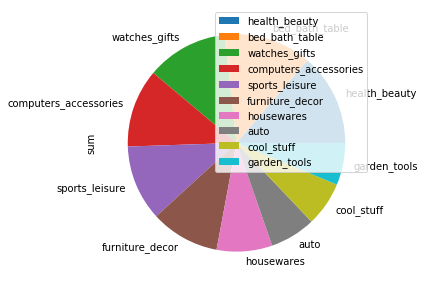

In [48]:
categories_group.columns = categories_group.columns.droplevel(0)
categories_group.sort_values(by="sum",ascending=False).iloc[0:10].plot.pie(y="sum",figsize=(5, 5))



In [22]:
categories_df= categories_group.sort_values(by="sum",ascending=False)


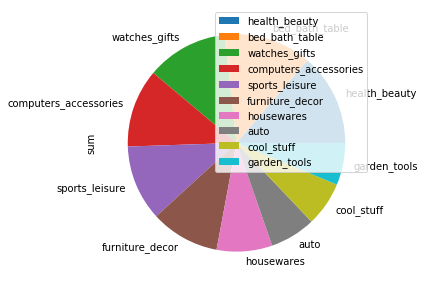

In [23]:
categories_group.sort_values(by="sum",ascending=False).iloc[0:10].plot.pie(y="sum",figsize=(5, 5))

{'whiskers': [<matplotlib.lines.Line2D at 0x254e192a4c8>,
 'caps': [<matplotlib.lines.Line2D at 0x254e192afc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x254e1921d88>],
 'medians': [<matplotlib.lines.Line2D at 0x254e1930ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x254e1930fc8>],
 'means': []}

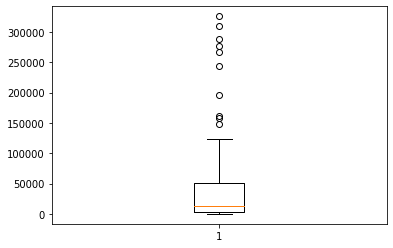

In [33]:
plt.boxplot([categories_df["sum"]])

In [45]:
cities_group = olist_data.groupby("geolocation_state").agg({
    "Total_Revenue_by_order":["sum","count","min","max","mean"],
    "geolocation_lat":"first",
    "geolocation_lng":"first"   
})
cities_group

Total_Revenue_by_order                             \
                                     sum  count      min        max   
geolocation_state                                                     
AC                          6.296640e+01      1  62.9664    62.9664   
AM                          2.643480e+02      3  28.4025   206.6946   
BA                          7.088033e+04    647   5.6238   983.1738   
CE                          5.264322e+03     94   5.5188   151.1916   
DF                          2.431282e+04    848   4.4100   237.6633   
ES                          1.433231e+04    366   5.0610   344.9334   
GO                          1.832754e+04    510   5.0190  1412.5986   
MA                          1.055800e+04    405  11.9994    79.5816   
MG                          2.936743e+05   8740   1.5288   784.6062   
MS                          2.163737e+03     50  16.5984   119.9436   
MT                          4.777712e+03    145  10.5105    76.8936   
PB                          4.177192e+03     35  12.2493   625.0986   
PE                          2.396920e+04    448   3.9039   487.6872   
PI                          6.227172e+02     12  16.8798    73.3803   
PR                          3.458539e+05   8717   2.4402  1453.6641   
RJ                          2.142033e+05   4891   2.9946   947.7972   
RN                          2.505546e+03     54   8.8158   419.2272   
RO                          1.184455e+03     14  19.0281   262.5882   
RS                          1.032913e+05   2154   4.0908  1277.1234   
SC                          1.729341e+05   4231   4.0341   715.3587   
SE                          5.090757e+02     10  26.8968    88.4856   
SP                          2.421414e+06  78396   1.2768  2869.4568   

                              geolocation_lat geolocation_lng  
                         mean           first           first  
geolocation_state                                              
AC                  62.966400       -9.974562      -67.809656  
AM                  88.116000       -3.135623      -60.023469  
BA                 109.552290      -12.981587      -38.455265  
CE                  56.003426       -3.890115      -38.447731  
DF                  28.670775      -15.840667      -48.051943  
ES                  39.159325      -20.954686      -41.350822  
GO                  35.936353      -16.770154      -49.340042  
MA                  26.069130       -2.546079      -44.308986  
MG                  33.601181      -19.916247      -43.936234  
MS                  43.274742      -20.487978      -54.652955  
MT                  32.949739      -15.672888      -56.067972  
PB                 119.348340       -6.494016      -37.449185  
PE                  53.502684       -8.138173      -34.932226  
PI                  51.893100       -5.139655      -42.749185  
PR                  39.675799      -24.940999      -53.493187  
RJ                  43.795399      -22.498183      -44.123614  
RN                  46.398994       -5.840266      -35.208260  
RO                  84.603900      -10.878860      -61.957201  
RS                  47.953234      -29.670349      -51.461468  
SC                  40.873108      -26.468503      -49.109883  
SE                  50.907570      -10.321119      -36.578358  
SP                  30.886955      -23.516747      -46.548182

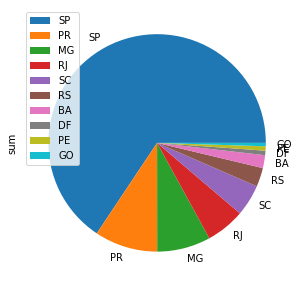

In [46]:
#TODO Rename colums Lat Lng, Titulos del gràfico y meterle valores
cities_group.columns = cities_group.columns.droplevel(0)
cities_group.sort_values(by="sum",ascending=False).iloc[0:10].plot.pie(y="sum",figsize=(5, 5))
cities_df = cities_group.sort_values(by="sum",ascending=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x254e1a757c8>,
 'caps': [<matplotlib.lines.Line2D at 0x254e1a75f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x254e1a6ff08>],
 'medians': [<matplotlib.lines.Line2D at 0x254e1a7af48>],
 'fliers': [<matplotlib.lines.Line2D at 0x254e1a7ac48>],
 'means': []}

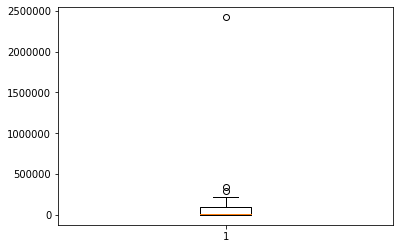

In [36]:
plt.boxplot([cities_df["sum"]])

In [38]:
sao_paulo_df=olist_data.query("geolocation_state=='SP'")
sao_paulo_df

Unnamed: 0                          order_id  order_item_id  \
127            127  76263f760191f470b92de7f5ff14053a              1   
128            128  803b1bae34b452deca8621b507e483f4              1   
129            129  a761862f0091efb27d04d58ad23de019              1   
130            130  d6f2337b7df53866592eb81ac57cdf74              1   
131            131  4019dc88e273c81a8e284257bb938f42              1   
...            ...                               ...            ...   
111017      111017  31a2886d02ad2127bfec204da2e93b66              1   
111018      111018  2c12150c742ae2fa48bc703964c16c5f              1   
111019      111019  2ef4a11b6e24fdfbb43b92cb5f95edff              1   
111020      111020  2ef4a11b6e24fdfbb43b92cb5f95edff              2   
111021      111021  9f7ba492c273ffac8f90a623b8eadd3b              1   

                              product_id                         seller_id  \
127     708cf9598cc7a8ed22f6f060d3ab547c  a416b6a846a11724393025641d4edd5e   
128     7f253218cda162fcc215fd4e0768b00c  a416b6a846a11724393025641d4edd5e   
129     e7bc716e2ba2575a2f572b7a4bd281d6  a416b6a846a11724393025641d4edd5e   
130     8096dd79187d317b844454d6e6d9039a  a416b6a846a11724393025641d4edd5e   
131     a5bc15d5136b84537fb92bb7c06f6837  4a3ca9315b744ce9f8e9374361493884   
...                                  ...                               ...   
111017  3a96bcbf644a5d390107570628568026  70126eecc6aa1274392a1743866e9678   
111018  2b54fb9a4acf707537eb53eb2458c241  ef728fa1f17436c91ed1ccd03dcf9631   
111019  9c313adb4b38a55b092f53f83f78be9e  ef728fa1f17436c91ed1ccd03dcf9631   
111020  eacb104882d39ffb53140b1d1860a7c3  ef728fa1f17436c91ed1ccd03dcf9631   
111021  5aa0d6ed4e6c0995d62090cd82cde89a  ef728fa1f17436c91ed1ccd03dcf9631   

        Total_order_values  Total_freight_values  Total_Revenue_by_order  \
127                  386.4                 18.95                 85.1235   
128                  369.0                 13.79                 80.3859   
129                  369.0                 18.83                 81.4443   
130                  829.0                 14.62                177.1602   
131                  169.0                 21.67                 40.0407   
...                    ...                   ...                     ...   
111017                19.8                  7.40                  5.7120   
111018                57.9                 19.60                 16.2750   
111019                19.0                 12.86                  6.6906   
111020                79.8                 25.74                 22.1634   
111021                11.9                 12.79                  5.1849   

        zip_code_prefix seller_city  geolocation_lat  geolocation_lng  \
127                3702   sao paulo       -23.516747       -46.548182   
128                3702   sao paulo       -23.516747       -46.548182   
129                3702   sao paulo       -23.516747       -46.548182   
130                3702   sao paulo       -23.516747       -46.548182   
131               14940    ibitinga       -21.766477       -48.831547   
...                 ...         ...              ...              ...   
111017             6449     barueri       -23.542750       -46.866258   
111018            17201         jau       -22.293284       -48.565582   
111019            17201         jau       -22.293284       -48.565582   
111020            17201         jau       -22.293284       -48.565582   
111021            17201         jau       -22.293284       -48.565582   

       geolocation_city geolocation_state repetido  \
127           sao paulo                SP    False   
128           sao paulo                SP    False   
129           sao paulo                SP    False   
130           sao paulo                SP    False   
131            ibitinga                SP    False   
...                 ...               ...      ...   
111017          barueri                SP    False

In [41]:
SP_group = sao_paulo_df.groupby("product_category_name_english").agg({
    "Total_Revenue_by_order":["sum","count","min","max","mean"]})
SP_group


Total_Revenue_by_order                          \
                                                 sum count     min       max   
product_category_name_english                                                  
agro_industry_and_commerce                 6809.6070    99  4.2819  668.7555   
air_conditioning                           7983.7380   165  5.4600  344.0535   
art                                        3732.6450   161  2.5662   69.6822   
arts_and_craftmanship                       326.0292    20  4.9308   31.8570   
audio                                     11617.9938   344  4.6809  133.7658   
...                                              ...   ...     ...       ...   
stationery                                47111.4273  1943  2.1147  367.3068   
tablets_printing_image                     1777.1880    82  6.3000   48.4638   
telephony                                 57481.5444  3913  2.6019  516.0624   
toys                                      70235.0943  2771  3.0009  319.8279   
watches_gifts                            226094.4903  4825  5.1009  843.5511   

                                          
                                    mean  
product_category_name_english             
agro_industry_and_commerce     68.783909  
air_conditioning               48.386291  
art                            23.184130  
arts_and_craftmanship          16.301460  
audio                          33.773238  
...                                  ...  
stationery                     24.246746  
tablets_printing_image         21.673024  
telephony                      14.689891  
toys                           25.346479  
watches_gifts                  46.858962  

[71 rows x 5 columns]

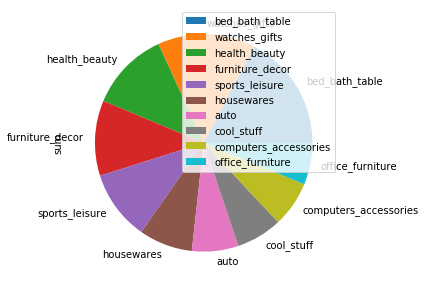

In [42]:
SP_group.columns = SP_group.columns.droplevel(0)
SP_group.sort_values(by="sum",ascending=False).iloc[0:10].plot.pie(y="sum",figsize=(5, 5))
SP_group = SP_group.sort_values(by="sum",ascending=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x254e38714c8>,
 'caps': [<matplotlib.lines.Line2D at 0x254e3871fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x254e386bc08>],
 'medians': [<matplotlib.lines.Line2D at 0x254e3874dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x254e3874ec8>],
 'means': []}

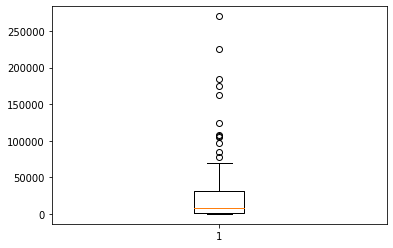

In [44]:
plt.boxplot([SP_group["sum"]])